# CSE 519 HW2

In [78]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import re

### Loading the dataset and feature exploration

In [79]:
# Load dataset as data matrix X
X = pd.read_csv(open("properties_2016.csv", "rb"))

After loading the dataset we have some inconsistent columns.
Let's try to find which rows are affected and what may be the cause.

In [80]:
inconsistent = [22, 32, 34, 49, 55]

for i in inconsistent:
    print X.keys()[i]

for i in inconsistent:
    print '\n'
    print X[X.keys()[i]]

hashottuborspa
propertycountylandusecode
propertyzoningdesc
fireplaceflag
taxdelinquencyflag


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
          ... 
2985187    NaN
2985188    NaN
2985189    NaN
2985190    NaN
2985191    NaN
2985192    NaN
2985193    NaN
2985194    NaN
2985195    NaN
2985196    NaN
2985197    NaN
2985198    NaN
2985199    NaN
2985200    NaN
2985201    NaN
2985202    NaN
2985203    NaN
2985204    NaN
2985205    NaN
2985206    NaN
2985207    NaN
2985208    NaN
2985209    NaN
2985210    NaN
2985211    NaN
2985212    NaN
2985213    NaN
2985214    NaN
2985215    NaN
29852

It seems to be the case that these features are String typed and NaN has some conflict.
Let's move on for now and examine what our feature space looks like...

In [81]:
print X.shape

(2985217, 58)


In [82]:
for key in X:
    print key

parcelid
airconditioningtypeid
architecturalstyletypeid
basementsqft
bathroomcnt
bedroomcnt
buildingclasstypeid
buildingqualitytypeid
calculatedbathnbr
decktypeid
finishedfloor1squarefeet
calculatedfinishedsquarefeet
finishedsquarefeet12
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
finishedsquarefeet6
fips
fireplacecnt
fullbathcnt
garagecarcnt
garagetotalsqft
hashottuborspa
heatingorsystemtypeid
latitude
longitude
lotsizesquarefeet
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
propertycountylandusecode
propertylandusetypeid
propertyzoningdesc
rawcensustractandblock
regionidcity
regionidcounty
regionidneighborhood
regionidzip
roomcnt
storytypeid
threequarterbathnbr
typeconstructiontypeid
unitcnt
yardbuildingsqft17
yardbuildingsqft26
yearbuilt
numberofstories
fireplaceflag
structuretaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
landtaxvaluedollarcnt
taxamount
taxdelinquencyflag
taxdelinquencyyear
censustractandblock


Now let us consider the data types of each feature.

In [83]:
for key in X.keys():
    print X[key].dtype

int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
float64
float64
float64
float64
object
float64
float64


It seems that my initial hunch was correct and the mixed type problem stemmed from certain features being String valued.
I will not consider these features for now and only examine numerical data for Pearson correlation.

Next, let's load the training data into a matrix as well and take a look at the values.

In [84]:
# Load training data into Y
Y = pd.read_csv(open("train_2016_v2.csv", "rb")).sort_values(by='parcelid')

print Y

        parcelid  logerror transactiondate
62285   10711738    0.0276      2016-08-02
62333   10711755   -0.0182      2016-08-02
31775   10711805   -0.1009      2016-05-03
22753   10711816   -0.0121      2016-04-05
56491   10711858   -0.0481      2016-07-15
71190   10711910    0.2897      2016-08-30
9113    10712086    0.0040      2016-02-12
79625   10712162   -0.0121      2016-09-27
68994   10712163    0.0139      2016-08-23
34099   10712195   -0.0450      2016-05-11
82951   10712316   -0.0387      2016-10-06
76893   10712345    0.0178      2016-09-16
1594    10712375    0.1493      2016-01-11
54029   10712391    0.0218      2016-07-08
43389   10712451    0.0554      2016-06-08
62492   10712478   -0.0954      2016-08-02
82665   10712525    0.0070      2016-10-05
77543   10712533   -0.0325      2016-09-20
86471   10712550   -0.0704      2016-10-28
69298   10712596   -0.0315      2016-08-24
82925   10712648    0.0218      2016-10-06
45474   10712667    0.0040      2016-06-14
27597   107

It seems that we only have a subset of 90275 data points for training.
Let us store a single dataframe with both training and test data.

In [85]:
training = X.merge(Y, on='parcelid', how='left').dropna(subset=['logerror'])

In [86]:
print training

         parcelid  airconditioningtypeid  architecturalstyletypeid  \
362      17073783                    NaN                       NaN   
428      17088994                    NaN                       NaN   
470      17100444                    NaN                       NaN   
480      17102429                    NaN                       NaN   
507      17109604                    NaN                       NaN   
555      17125829                    NaN                       NaN   
570      17132911                    NaN                       NaN   
580      17134926                    NaN                       NaN   
605      17139988                    NaN                       NaN   
719      17167359                    NaN                       NaN   
757      17179760                    NaN                       NaN   
805      17198685                    NaN                       NaN   
853      17212207                    NaN                       NaN   
858      17213421   

### Pearson Correlation

Now that we have examined the data and isolated our training set we are in a position to run analysis.
First let us run correlation analysis between all non-ID based variables found in the entire training matrix, X.

In [91]:
correlation = X.corr(method='pearson').select(lambda x: not re.search('id', x))

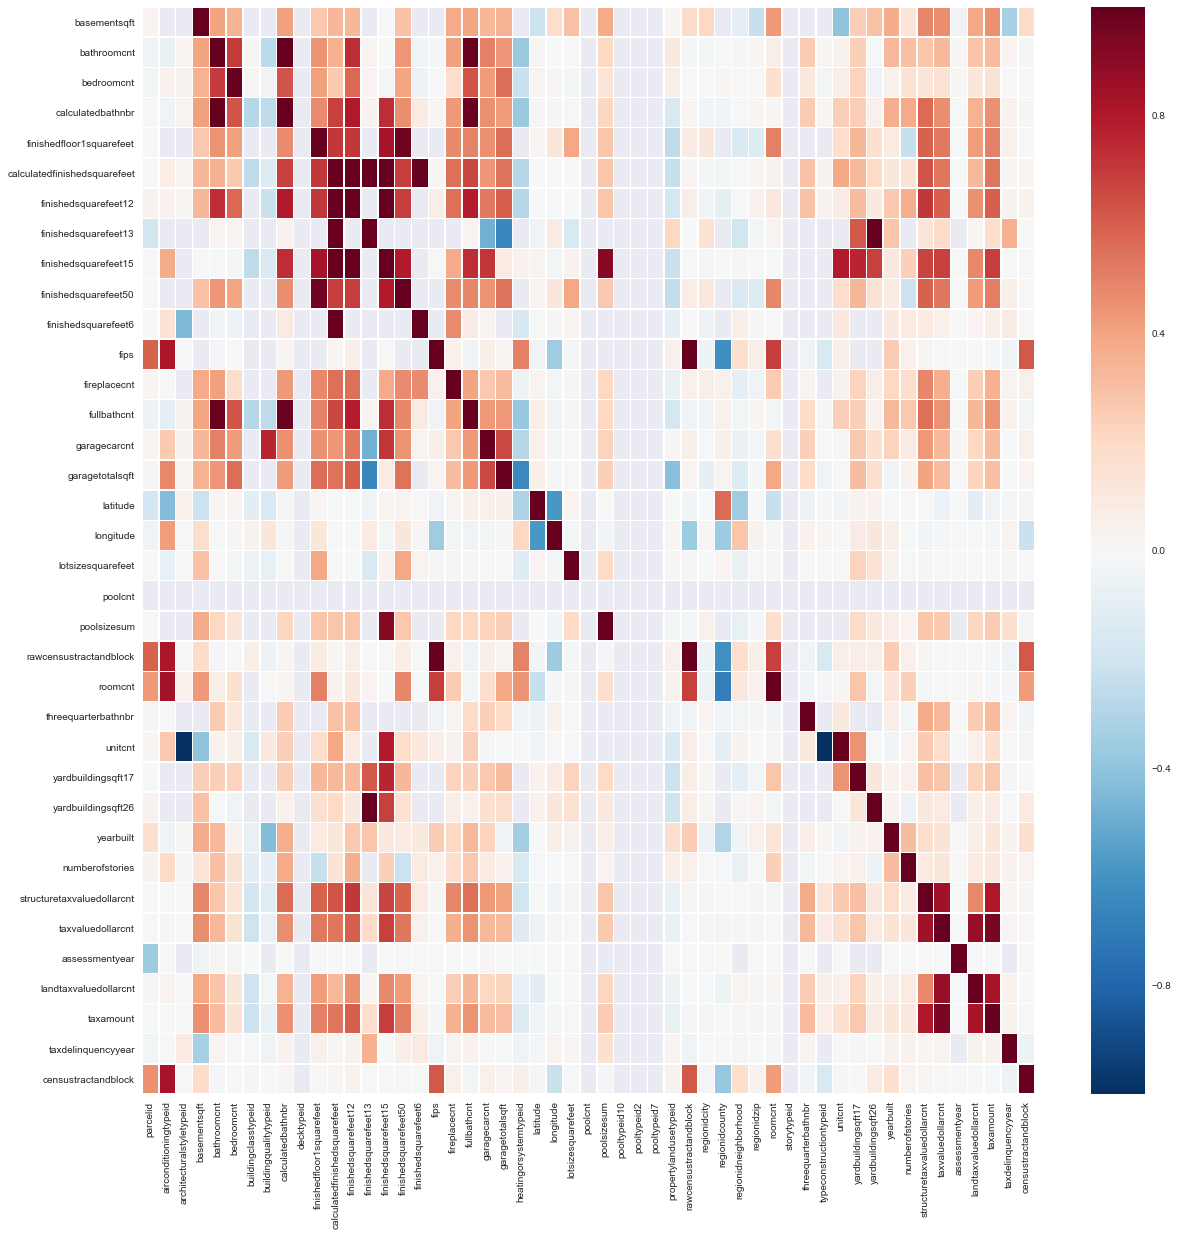

In [92]:
sns.heatmap(correlation, linewidths=.5)
sns.plt.show()

### 5 Interesting Plots

Let's examine how correlated each individual numerical feature is with the log error.  Again, we should not include the results computed using ID fields in the correlation analysis.

In [96]:
error_correlation = training.corr(method='pearson')['logerror'][:-1].select(lambda x: not re.search('id', x))

print error_correlation

basementsqft                    0.253395
bathroomcnt                     0.027889
bedroomcnt                      0.025467
calculatedbathnbr               0.029448
finishedfloor1squarefeet        0.026242
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet12            0.041922
finishedsquarefeet13            0.034715
finishedsquarefeet15            0.019327
finishedsquarefeet50            0.023619
finishedsquarefeet6             0.036847
fips                            0.008363
fireplacecnt                    0.033235
fullbathcnt                     0.028845
garagecarcnt                    0.026531
garagetotalsqft                 0.023888
latitude                        0.004915
longitude                      -0.003432
lotsizesquarefeet               0.004835
poolcnt                              NaN
poolsizesum                    -0.000454
rawcensustractandblock          0.008376
roomcnt                         0.005760
threequarterbathnbr             0.034069
unitcnt         

A quick scan of the remaining entries shows relatively low correlation between any of the values and the log error.  
Interestingly basementsqft has much higher correlation coefficient than any other field.

In [90]:
print list(error_correlation.index)
print error_correlation.values

['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'rawcensustractandblock', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear', 'censustractandblock']
[ 0.25339468  0.02788929  0.02546709  0.02944769  0.02624173  0.03878407
  0.04192237  0.034715    0.01932728  0.02361865  0.03684695  0.00836348
  0.03323502  0.02884512  0.02653123  0.02388826  0.00491547 -0.00343222
  0.00483525         nan -0.00045417  0.00837566  0.0057598   0.03406867
 -0.003983   -0.0